Evolution Strategies for Deep Learning
==============

In this interactive tutorial, we will be reviewing using random optimization techniques and evolutionary algorithms for learning systems, like Neural Networks.
The tutorial is active and will be updated over time with new experiments, results and improvements.

Motivation
=============
Currently, deep neural networks and other models, are trained using gradient descent algorithms.
For a lot of models and examples this works very, but also has a few downsides:

* High memory usage. Computing the gradient of a model scales linearly with the batch size, which means that for large models multiple GB's of expensive, high bandwidth GPU memory
* Because optimization depends on the gradient, the model must be differentable.
* Gradient-based optimization without noise get stuck in local minima.

In this interactive article, we will show how random search methods can learn / optimize, what methods help and how they compare to gradient-based optimization.

Toy Example
=============

In this example we will be optimizing the function `f(x) = x²`. The minimum of `f(x)` is at `x=0`. 
Here, we will be using the simplest case of using just one sample per iteration and just one mutation.
We also keep no history or pool of the best performing examples, but are going to apply an update at each step if it improves the value.

In [2]:
import numpy as np, matplotlib.pyplot as plt, math

# seed the random number generator, so we'll get the same result every time
np.random.seed(42)
# the learning rate, or step which is multiplied by our random sample
lr = 1.0
# the parameters of our model, which we want to optimize
# We choose a not optimal value of -5
param_x = -5

# The function f which we want to minimize
def quadratic(x):
    return x ** 2

# the optimization algorithm
def optimize(f, param_x, lr=0.1, num_iters=40):
    prev_val = f(param_x)
    loss_history = [prev_val]
    param_history = [param_x]
    for _ in range(num_iters):
        # we create a sample, here from a normal distribution
        # with zero mean and 
        sample = np.random.normal(scale=lr)
        # we measure the improvement 
        improvement = prev_val - f(param_x + sample)

        # apply update if it improves performance
        if improvement >= 0.0:
            param_x = param_x + sample

        prev_val = f(param_x)

        loss_history.append(prev_val)
        param_history.append(param_x)
        
    return loss_history, param_history

loss_history, param_history = optimize(quadratic, param_x, lr=lr)
loss_line, = plt.plot(loss_history, label='f(x)')
param_line, = plt.plot(param_history, label='x')

plt.legend(handles=[loss_line, param_line])


plt.show()

We see that the loss quickly drops to about 0 down after about 8 iterations.
Increasing the learning rate makes optimization faster, but also more unstable.

Harder example
=======

In the next example, we define a function that is harder to optimize than a parabolic function.


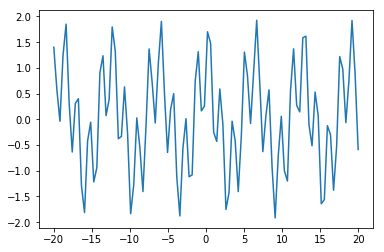

In [3]:

def harder(x):
    return math.cos(x) + math.sin(4 * x)

vals = np.linspace(-20.0, 20.0, 100)
plt.plot(vals, [harder(x) for x in vals])
plt.show()



The function has (infinitely) many local minima and also global minima. 

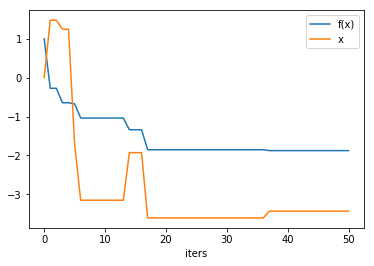

-3.432084134597131


In [5]:
param_x = 0
loss_history, param_history = optimize(harder, param_x, lr=2.0, num_iters=50)
loss_line, = plt.plot(loss_history, label='f(x)')
param_line, = plt.plot(param_history, label='x')

plt.xlabel('iters')
plt.legend(handles=[loss_line, param_line])
plt.show()
print("x", param_history[-1])

As you can see, after less than 40 changes the method found a global optimimum.